In [6]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt


df = pd.read_csv("shuffled_2class_iris_dataset.csv")
print(df.head())

df = df.values
X = df[:,0:4]   
y = df[:,4]     


diff = X.max(0) - X.min(0)
X = X - diff


train_data = X[0:90,0:4]; train_label = y[0:90]
test_data = X[90:100,0:4]; test_label = y[90:100]

   sepal_width  sepal_length  petal_width  petal_length  class
0          5.6           3.0          4.1           1.3      0
1          5.4           3.9          1.7           0.4      1
2          5.6           3.0          4.5           1.5      0
3          5.0           3.5          1.6           0.6      1
4          5.5           2.4          3.7           1.0      0


In [7]:
zz = np.ones((len(test_data),1))
test_data = np.concatenate((zz,test_data), axis=1)  

np.random.seed(1)

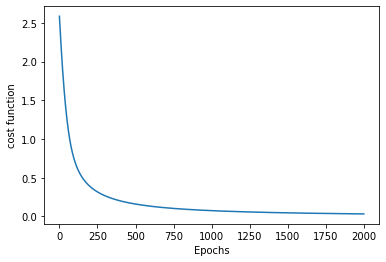

In [8]:
nu = 0.01
MAX_EPOCHS = 2000
J_vec = []


zz = np.ones((len(train_data),1))
X_train = np.concatenate((zz,train_data), axis=1)
y_train = train_label.reshape(len(train_label),1)  
w = np.random.rand(5,1)
w0 = w[0]; w1 = w[1]; w2 = w[2]; w3 = w[3]; w4 = w[4]
N = len(y_train)

for itr in range (0, MAX_EPOCHS):
    for i in range(0,len(X_train)):
        sigma = 1/(1+(np.exp(-(w0*X_train[i][0] + w1*X_train[i][1] + w2*X_train[i][2] + w3*X_train[i][3] + w4*X_train[i][4]))))

        w0 = w0 - nu * (sum((sigma - y_train[i])*X_train[i][0]))/N
        w1 = w1 - nu * (sum((sigma - y_train[i])*X_train[i][1]))/N
        w2 = w2 - nu * (sum((sigma - y_train[i])*X_train[i][2]))/N
        w3 = w3 - nu * (sum((sigma - y_train[i])*X_train[i][3]))/N
        w4 = w4 - nu * (sum((sigma - y_train[i])*X_train[i][4]))/N        
   
        J = -(sum((y_train[i]*np.log(sigma))+((1-y_train[i])*np.log(1 - sigma))))
    
    J_vec.append(J)   
    
  
plt.plot(J_vec)
plt.xlabel('Epochs')
plt.ylabel('cost function')
plt.show()

In [9]:
correct_class_cnt = 0
for i in range (0, len(test_data)):
    
    sigma = 1/(1+(np.exp(-(w0*test_data[i][0] + w1*test_data[i][1] + w2*test_data[i][2] + w3*test_data[i][3] + w4*test_data[i][4]))))
    
    if sigma <0.5:
        y_hat = 0.0
    else:
        y_hat = 1.0

    
    print('y={}, y_hat={}'.format(test_label[i], y_hat))
    if (y_hat == test_label[i]):
        correct_class_cnt += 1

print('Average accuracy = {0:2f}'.format(correct_class_cnt/10))

y=1.0, y_hat=1.0
y=1.0, y_hat=1.0
y=0.0, y_hat=0.0
y=1.0, y_hat=1.0
y=0.0, y_hat=0.0
y=1.0, y_hat=1.0
y=0.0, y_hat=0.0
y=0.0, y_hat=0.0
y=0.0, y_hat=0.0
y=1.0, y_hat=1.0
Average accuracy = 1.000000
